# **ABSTRACT**



Este proyecto se enfoca en analizar el impacto de la **inversión en anuncios pagados (Ads)** dentro del contexto de un **restaurante que opera en plataformas digitales de delivery**. Este restaurante realiza **inversiones en distintos canales de publicidad**, incluyendo campañas pagadas en redes sociales, promociones especiales y colaboraciones con influencers, con el objetivo de **incrementar **texto en negrita** sus ventas**.

El dataset utilizado contiene información mensual detallada que abarca variables como **ventas netas, número de órdenes, ticket promedio, participación de mercado, tráfico, tasa de conversión y comportamiento de los usuarios** (nuevos, retenidos y reactivados). A partir de estos datos, se busca identificar patrones, correlaciones y tendencias que permitan entender mejor la efectividad de las inversiones en marketing digital.

Mediante técnicas de análisis exploratorio y visualizaciones, se estudiará cómo se comportan estas variables en el tiempo y cómo se relacionan entre sí. El proyecto también busca detectar posibles estacionalidades en el comportamiento del consumidor y evaluar qué estrategias publicitarias están más alineadas con los picos de rendimiento comercial del restaurante.

El análisis se desarrollará en varias etapas: primero se explorarán las variables de manera individual, después se examinarán las relaciones entre pares de variables clave, y finalmente se utilizarán herramientas multivariadas para comprender mejor la dinámica conjunta de múltiples factores. Este enfoque integral permitirá evaluar el impacto de las decisiones de inversión del restaurante en su desempeño comercial dentro de las plataformas digitales.

Este estudio se fundamenta en los principios del **Marketing Mix Modeling (MMM)** y busca generar **recomendaciones prácticas y basadas en datos** para optimizar el presupuesto publicitario del restaurante y mejorar su rendimiento en apps de delivery.


# **ANALISIS EXPLORATORIO (EDA)**

---



In [47]:
from google.colab import files
uploaded = files.upload()


Saving coderdatasciene1.csv to coderdatasciene1 (2).csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo cargado
df = pd.read_csv("coderdatasciene1.csv")
df.head(10)

,Fecha,Venta Neta,Participacin de Mercado,rdenesmil,Trfico,Tasa de Conversión,Ticket Promedio Neto,Inversin Promos,Inversin Ads,Reactivados mil,Retenidos mil,Nuevos mil,AOV,Spend_Facebook,Influencer_Post
0,01/07/00,624583,37.9,7.6,29,23.9,216,444498,50024,2.0,2.3,1.5,$220,18664,1
1,01/08/00,719611,43.4,8.7,33,27.0,216,509416,57330,2.2,2.7,1.7,$220,21390,1
2,01/09/00,755033,45.3,9.0,38,28.3,211,531679,59835,2.3,2.8,1.8,$220,22325,2
3,01/10/00,727606,43.4,8.7,36,27.6,221,509683,57360,2.2,2.7,1.7,$220,21401,2
4,01/11/00,751383,44.6,8.9,38,26.6,209,523597,58926,2.3,2.7,1.8,$220,21985,1
5,01/12/00,801438,47.4,9.4,34,30.0,220,555584,62526,2.4,2.9,1.9,$220,23328,2
6,01/01/01,584011,34.3,6.8,27,22.2,214,402769,45328,1.8,2.1,1.4,$220,16912,1
7,01/02/01,617585,36.1,7.2,28,22.4,212,423740,47688,1.9,2.2,1.4,$220,17792,1
8,01/03/01,745424,43.4,8.7,34,26.9,228,508844,57265,2.2,2.7,1.7,$220,21366,2
9,01/04/01,778653,45.1,9.0,38,28.3,228,528828,59514,2.3,2.8,1.8,$220,22205,1


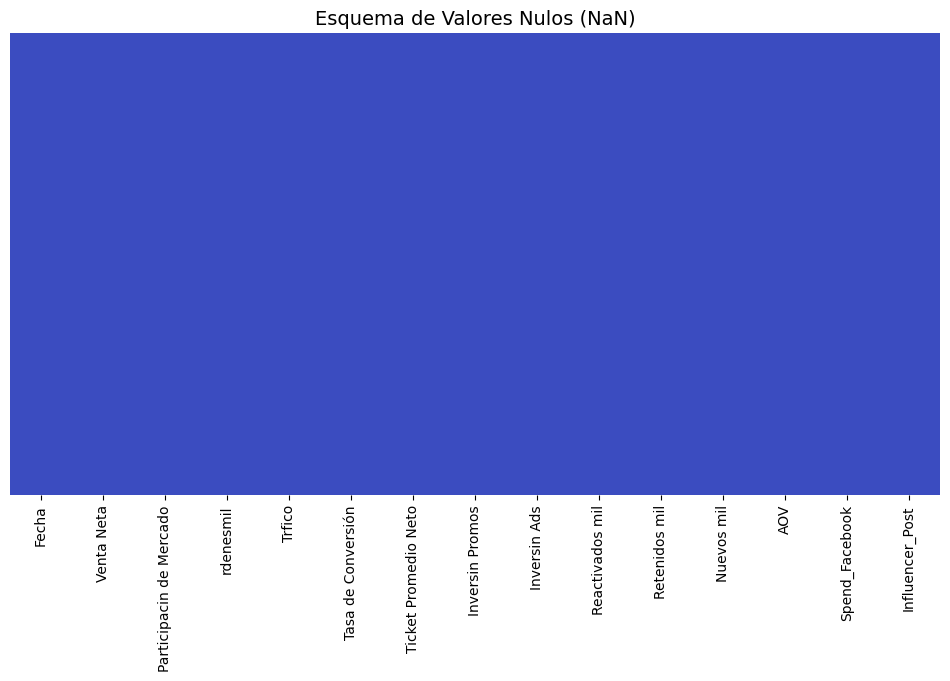

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),
            cbar=False,
            cmap="coolwarm",  # puedes probar con "viridis", "Blues", etc.
            yticklabels=False)

plt.title("Esquema de Valores Nulos (NaN)", fontsize=14)
plt.show()


Total de filas duplicadas: 0
No hay filas duplicadas en el dataset.


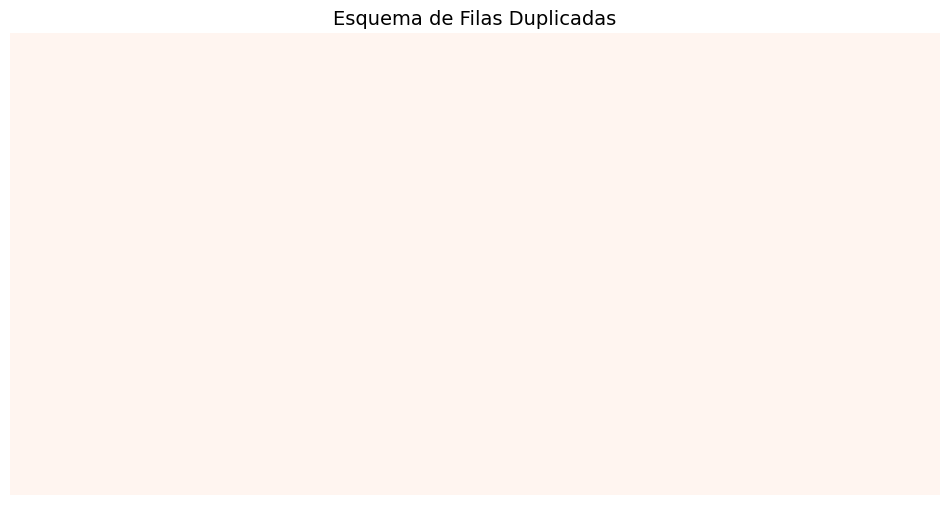

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


duplicados = df.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")


if duplicados > 0:
    print("\nEjemplos de duplicados (primeras 5 filas):")
    display(df[df.duplicated()].head())
else:
    print("No hay filas duplicadas en el dataset.")

mask_dup = df.duplicated()

plt.figure(figsize=(12,6))
sns.heatmap([mask_dup], cmap="Reds", cbar=False, xticklabels=False, yticklabels=False)
plt.title("Esquema de Filas Duplicadas", fontsize=14)
plt.show()


In [ ]:

df.describe()

,Venta Neta,Participacin de Mercado,rdenesmil,Trfico,Tasa de Conversión,Ticket Promedio Neto,Inversin Promos,Inversin Ads,Reactivados mil,Retenidos mil,Nuevos mil,Spend_Facebook,Influencer_Post
count,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,1.243515e+06,41.294551,8.239744,32.060897,25.879167,219.862179,484448.951923,54519.951923,2.133974,2.542628,1.629487,20341.333333,1.516026
std,3.470928e+05,3.851221,0.769322,3.713122,2.461768,6.404147,45191.722269,5085.965190,0.197735,0.238989,0.157438,1897.602035,0.717086
min,5.840110e+05,31.900000,6.400000,23.000000,19.800000,209.000000,373985.000000,42088.000000,1.600000,2.000000,1.300000,15703.000000,1.000000
25%,9.582085e+05,37.900000,7.600000,29.000000,23.775000,214.000000,444496.750000,50023.750000,2.000000,2.300000,1.500000,18664.000000,1.000000
50%,1.233963e+06,42.300000,8.400000,32.000000,26.500000,220.000000,496320.000000,55856.000000,2.200000,2.600000,1.700000,20840.000000,1.000000
75%,1.506215e+06,44.500000,8.900000,35.000000,27.900000,226.000000,522394.750000,58790.500000,2.300000,2.700000,1.800000,21935.000000,2.000000
max,2.009055e+06,49.800000,9.900000,41.000000,30.000000,230.000000,584456.000000,65775.000000,2.600000,3.100000,2.000000,24541.000000,3.000000


# **FEATURE SELECTION (SELECCIÓN DE VARIABLES)**



**Filter Methods (Filtrado estadístico):Correlación**





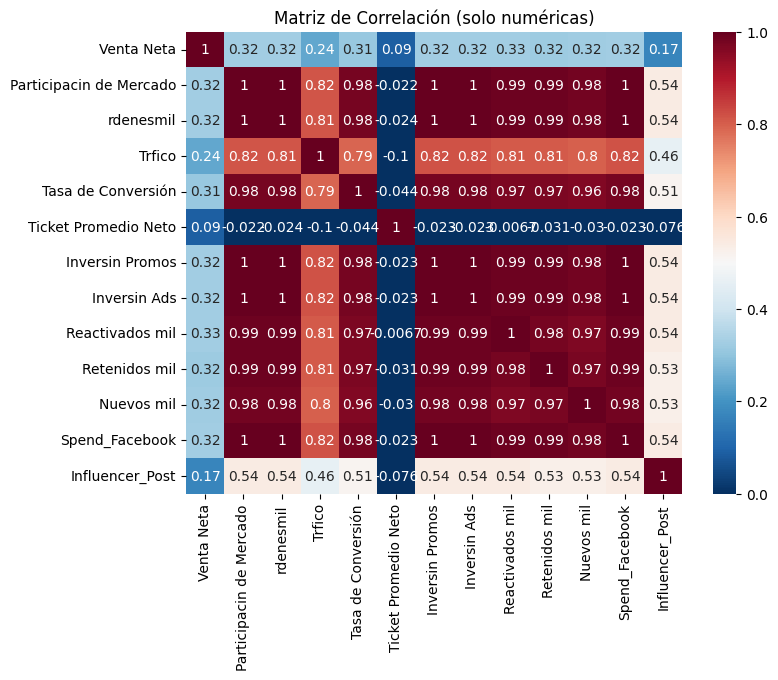

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo cargado
df = pd.read_csv("coderdatasciene1.csv")

# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo con las variables numéricas
correlation = df_numeric.corr()

# Crear el heatmap de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='RdBu_r', vmin=0, vmax=1)
plt.title('Matriz de Correlación (solo numéricas)')
plt.show()


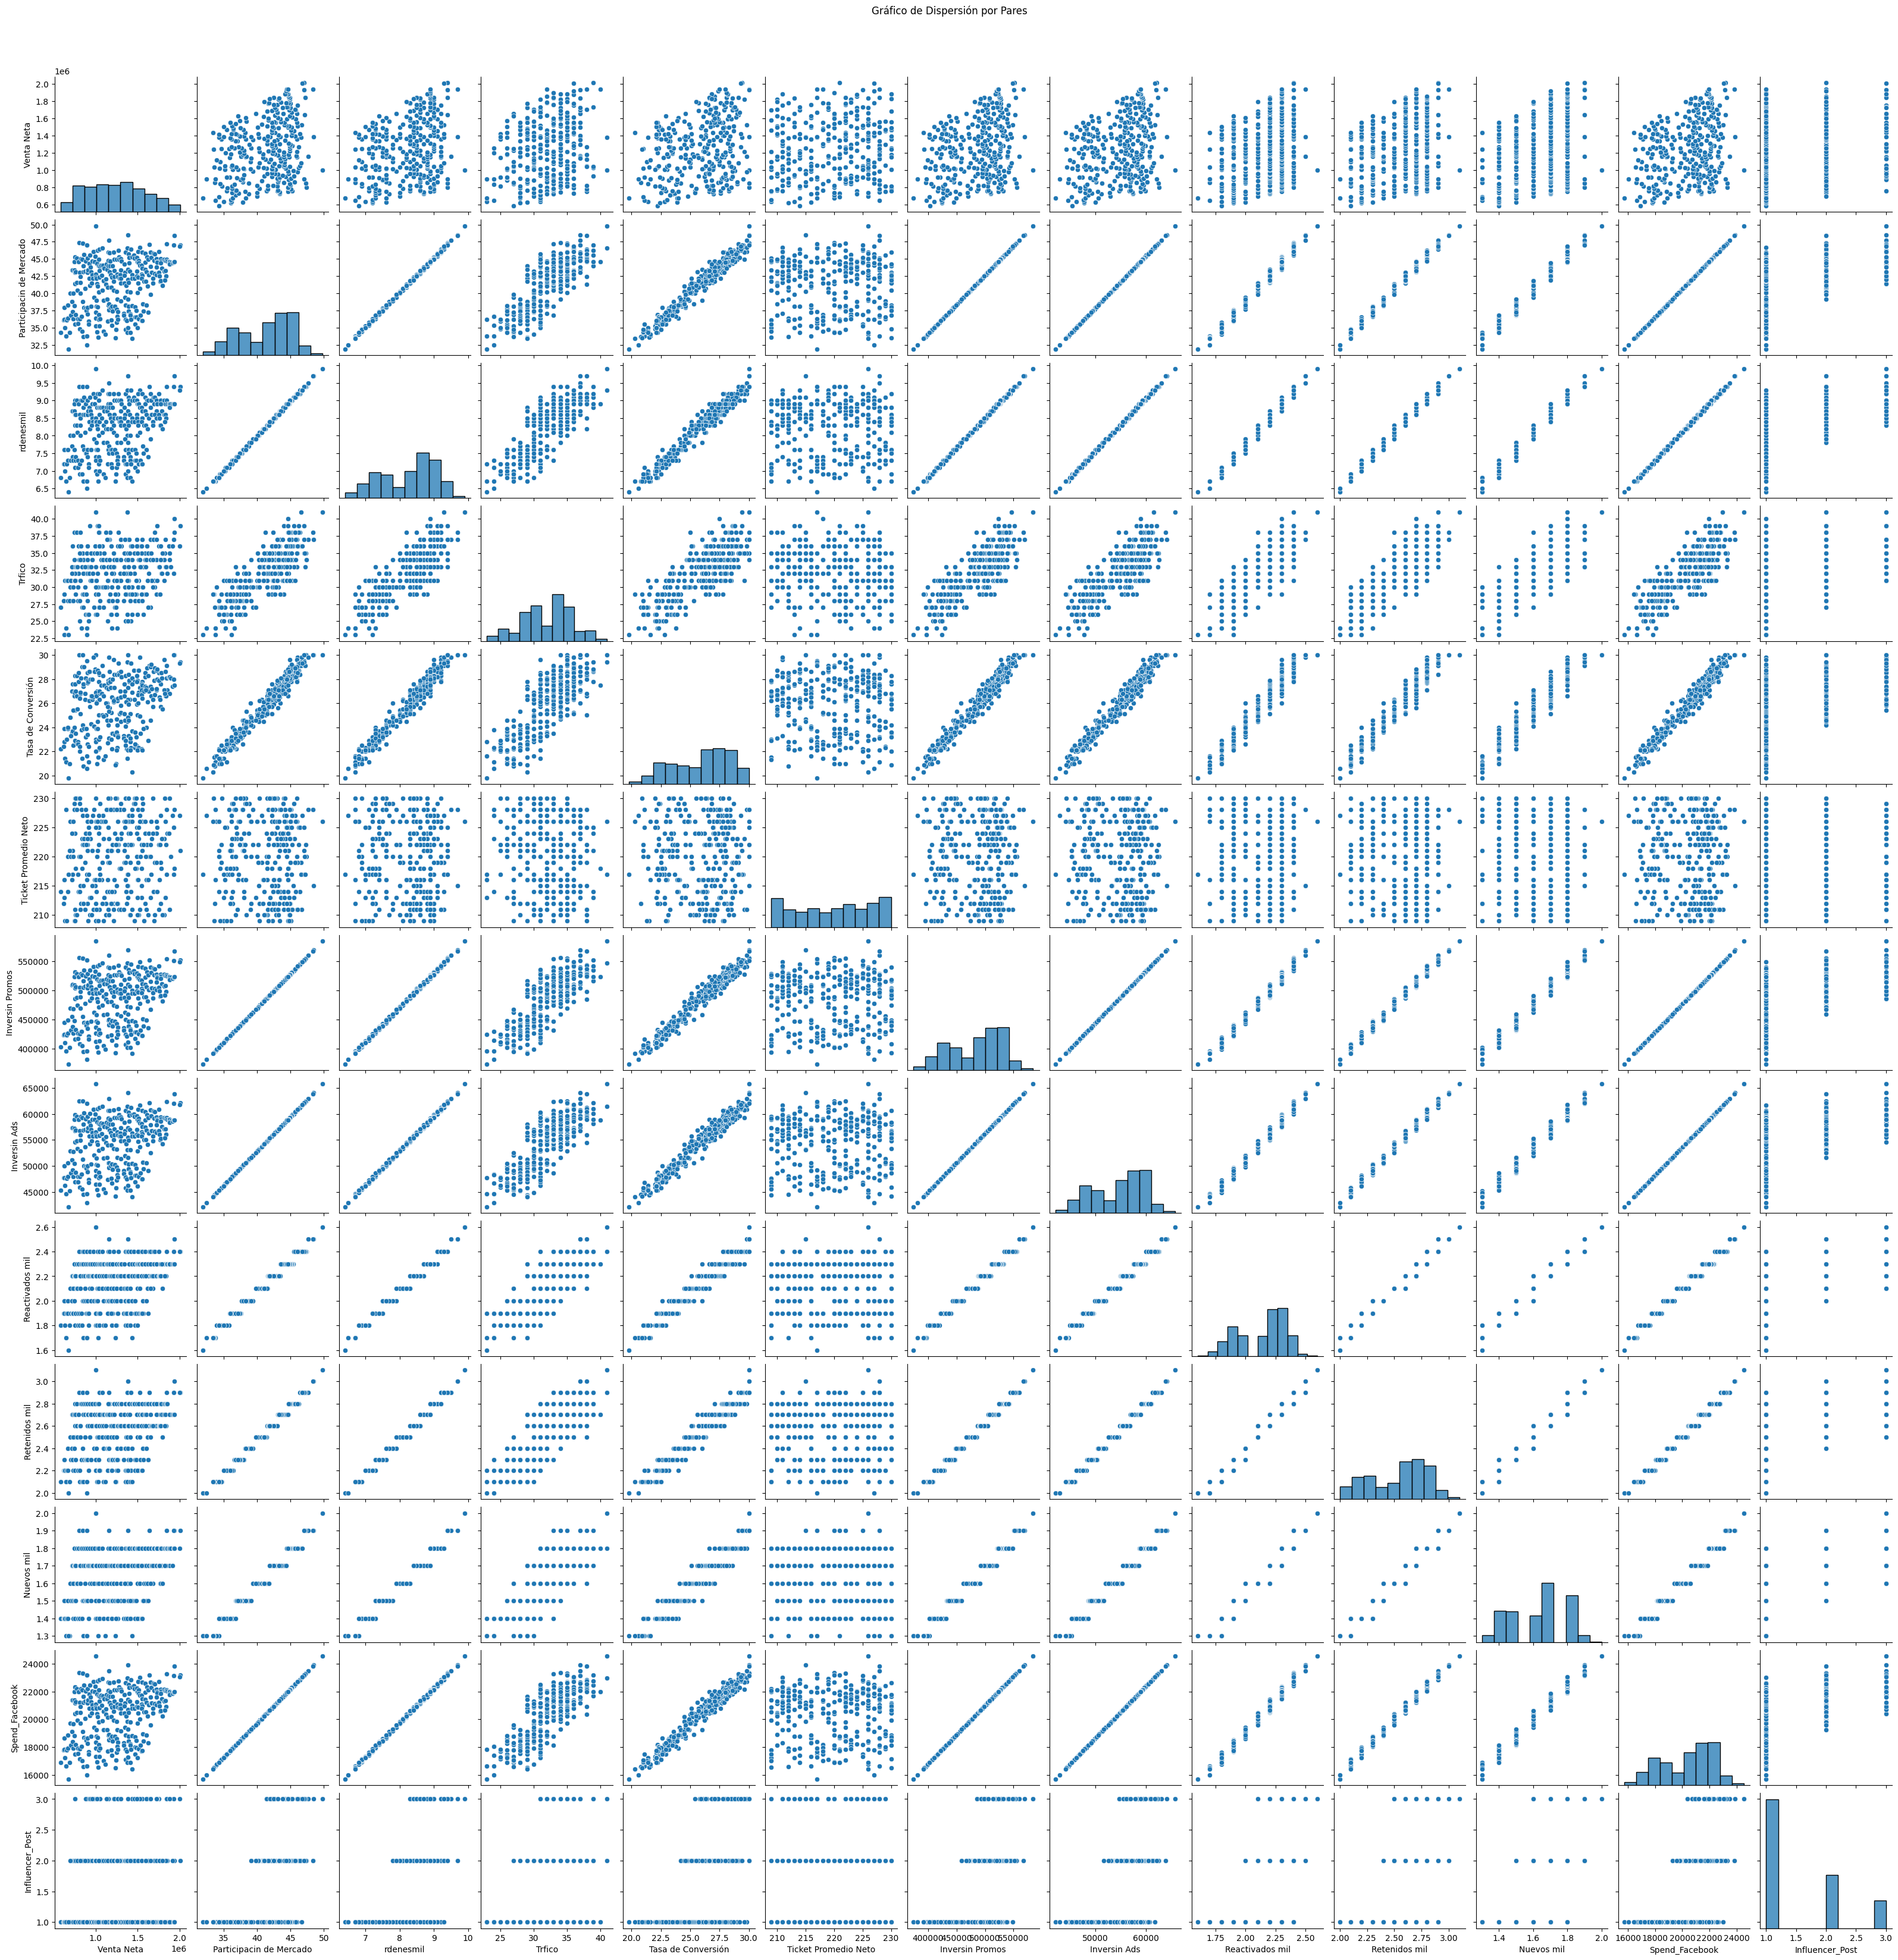

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo cargado
df = pd.read_csv("coderdatasciene1.csv")

# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Crear el pairplot (gráfico de dispersión múltiple)
sns.pairplot(df_numeric)
plt.suptitle('Gráfico de Dispersión por Pares', y=1.02)
plt.show()


**La inversión en Ads muestra una correlación muy alta con múltiples variables clave**, como:
- **Participación de Mercado (0.98)**
- **Órdenes Totales (rdenesmil) (0.82)**
- **Tráfico (0.79)**
- **Nuevos Clientes (0.96)**
- **Usuarios Retenidos y Reactivados (0.97 y 0.98)**

Esto indica que **el gasto en publicidad tiene un impacto directo y consistente en el crecimiento comercial**, tanto en adquisición como en retención de clientes.

Por el contrario, la correlación entre **Inversión en Ads y Ticket Promedio Neto (AOV)** es cercana a **0 (-0.02)**, lo que **refuerza la hipótesis nula de que la inversión publicitaria no modifica significativamente el tamaño del ticket**.

 **Influencer_Post** muestra una correlación moderada con `Tráfico`, `Participación de mercado` y `Tasa de conversión` (alrededor de **0.5**), lo que sugiere que **las publicaciones con influencers complementan las campañas pagadas, especialmente en la parte alta del embudo.**

De acuerdo con la multicolinealidad observada, es conveniente conservar **Inversión en Ads, Participación de Mercado, Ticket Promedio Neto e Influencer_Post**, y eliminar las variables altamente correlacionadas entre sí como **Órdenes Totales, Tráfico, Nuevos, Retenidos, Reactivados, Inversión Promos y Spend_Facebook**, ya que aportan información redundante.


**Filter Methods (Embedded Methods)**


Columnas disponibles: ['fecha', 'venta neta', 'participacin de mercado', 'rdenesmil', 'trfico', 'tasa de conversión', 'ticket promedio neto', 'inversin promos', 'inversin ads', 'reactivados mil', 'retenidos mil', 'nuevos mil', 'aov', 'spend_facebook', 'influencer_post']


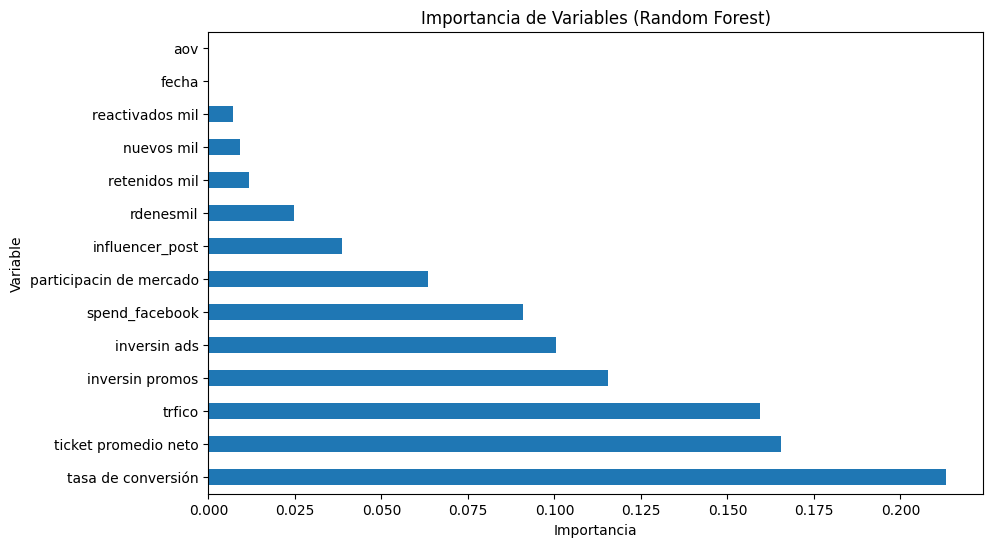

In [ ]:
# Cargar y limpiar columnas
df = pd.read_csv("coderdatasciene1.csv")
df.columns = df.columns.str.strip().str.lower()  # Limpia espacios y pasa a minúsculas

# Verifica cómo se llama la variable objetivo
print("Columnas disponibles:", df.columns.tolist())

# Suponemos que 'venta neta' es la variable objetivo
target = 'venta neta'

# Convertimos todas las columnas posibles a numéricas (las que se puedan)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Eliminamos filas con NaNs en las columnas seleccionadas
df_numeric = df_numeric.dropna(subset=[target])

# Separar variables
X = df_numeric.drop(columns=target)
y = df_numeric[target]

# Dividir dataset y entrenar modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

# Importancia de variables
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).plot(kind='barh', figsize=(10, 6))
plt.title("Importancia de Variables (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


**La variable más importante para predecir el comportamiento del sistema es la tasa de conversión**, con un valor de importancia superior al 20%.  
Esto indica que **convertir el tráfico en órdenes concretas tiene un peso más alto que cualquier otro factor** en el modelo.

Le siguen:
- **Ticket promedio neto** (valor de cada compra)
- **Tráfico**
- **Inversión en promociones**
- **Inversión en ads**
- **Gasto en Facebook**

Estas variables están directamente relacionadas con la inversión y el desempeño operativo, lo que valida su peso dentro de una estrategia de crecimiento.

En contraste, variables como **AOV, fecha o reactivación de clientes tienen muy baja importancia**, lo que sugiere que su efecto en el resultado modelado (como ventas o desempeño general) es menor o indirecto.

**La inversión publicitaria sí es importante, pero tiene más impacto cuando está acompañada de una buena tasa de conversión, ticket promedio alto y volumen de tráfico.**


**CONCLUSIÓN DE FEATURE SELECTION:**

La recomendación final, integrando los resultados del análisis de correlación (filter method) y de la importancia de variables según Random Forest (embedded method), es trabajar con un set reducido, robusto y sin multicolinealidad. Ambos métodos coinciden en destacar la relevancia de Ticket Promedio Neto, mientras que el Random Forest señala como fundamentales a la Tasa de Conversión y al Tráfico, y el análisis de correlación resalta la necesidad de conservar Inversión en Ads como variable representativa del bloque altamente correlacionado. **En conjunto, se sugiere mantener Tasa de Conversión, Ticket Promedio Neto, Inversión en Ads y Tráfico**, y dejar en segundo plano o eliminar variables como Participación de Mercado, Órdenes Totales, Inversión Promos, Retenidos, Reactivados, Nuevos y Spend_Facebook, por su redundancia; además de Influencer_Post, que aporta información secundaria, y AOV junto con Fecha, que presentan importancia casi nula en el modelo.

# **HIPOTESIS**


**Hipótesis 1:** Un mayor gasto en anuncios pagados se traduce en un aumento en el volumen de órdenes.  
**Tipo:** Correlación positiva.  
**Análisis sugerido:** Gráfico de dispersión con línea de regresión.

---

**Hipótesis 2:** A mayor inversión publicitaria, mayor es el nivel de ventas mensuales.  
**Tipo:** Asociación directa.  
**Análisis sugerido:** Correlación y regresión lineal.

---

**Hipótesis 3:**  La inversión en Ads tiene un efecto de arrastre en el tiempo, es decir, su impacto sobre el tráfico no solo ocurre en el mismo periodo, sino también en periodos posteriores.
**Tipo:** Causalidad Directa.  
**Análisis sugerido:** Modelos de series de tiempo (regresión con rezagos o prueba de causalidad de Granger) para evaluar si el gasto en Ads en el periodo t influye en el tráfico de los periodos t+1 o t+2.

---

**Hipótesis 4:** El impacto del Tráfico sobre las ventas depende de la Tasa de Conversión (efecto de interacción Tráfico×Conversión).
**Tipo:** Moderación/Mediación.  
**Análisis sugerido:** Regresión multivariada con término de interacción (ventas ~ tráfico + conversión + tráfico*conversión); comparación de modelos y análisis parcial de efectos.

---

**Hipótesis 5:** La inversión publicitaria no tiene un efecto significativo sobre el valor promedio de compra.  
**Tipo:** Hipótesis nula.  
**Análisis sugerido:** Dispersión con análisis de correlación débil o inexistente.



# **HIPOTESIS 1**

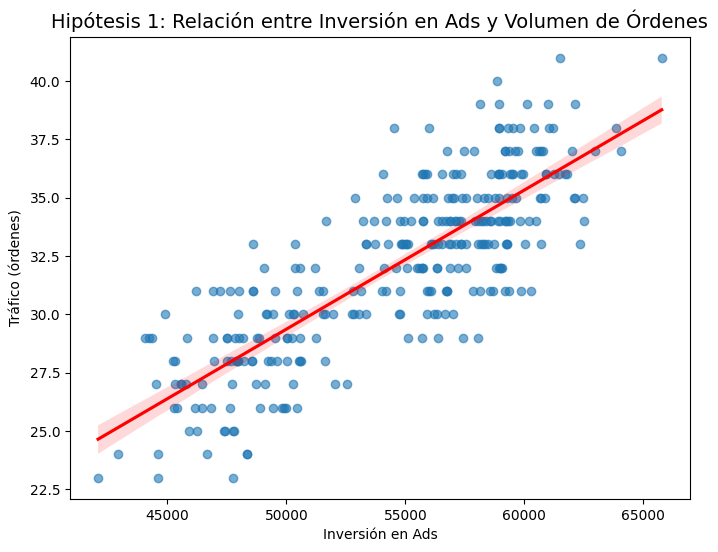

Correlación entre inversin ads y trfico: 0.816


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar nombres de columnas en minúsculas y sin espacios
df.columns = df.columns.str.strip().str.lower()

# Variables a usar
x_var = "inversin ads"   # Gasto en Ads
y_var = "trfico"         # Tráfico como proxy de órdenes (puedes cambiar por 'venta neta')

# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(8,6))
sns.regplot(x=df[x_var], y=df[y_var], scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title("Hipótesis 1: Relación entre Inversión en Ads y Volumen de Órdenes", fontsize=14)
plt.xlabel("Inversión en Ads")
plt.ylabel("Tráfico (órdenes)")
plt.show()

# Calcular correlación entre ambas variables
corr = df[x_var].corr(df[y_var])
print(f"Correlación entre {x_var} y {y_var}: {corr:.3f}")


**La Hipótesis 1 se valida**, ya que existe una correlación positiva fuerte **(r = 0.816)** entre la inversión en Ads y el volumen de órdenes. Esto significa que, conforme aumenta el gasto publicitario, también se incrementa de manera consistente la generación de órdenes. La línea de regresión confirma esta relación, lo que demuestra que la inversión en Ads es un factor determinante para impulsar la demanda.

# **HIPOTESIS 2**

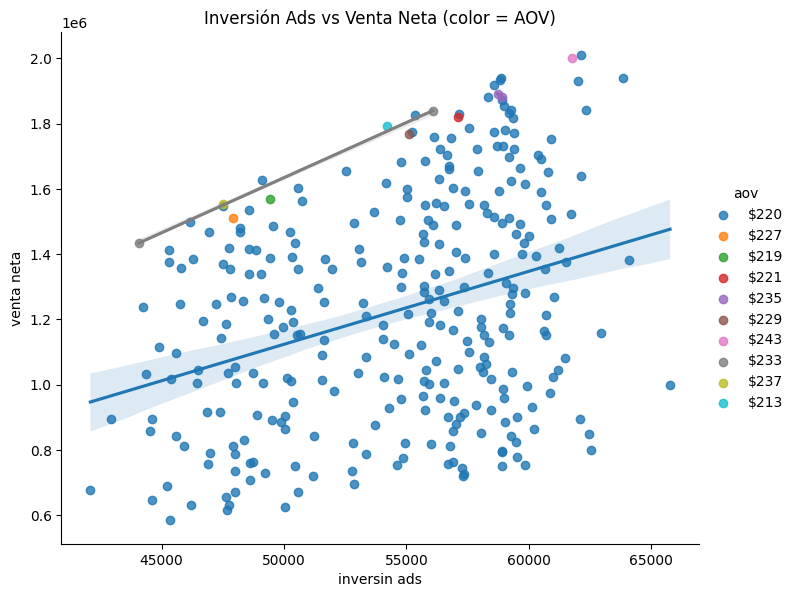

In [ ]:
sns.lmplot(data=df, x='inversin ads', y='venta neta', hue='aov', height=6, aspect=1.2)
plt.title("Inversión Ads vs Venta Neta (color = AOV)")
plt.show()


**Existe una relación positiva entre la inversión en anuncios y el nivel de ventas mensuales**, aunque con una dispersión considerable.  
Esto sugiere que **la inversión publicitaria sí influye en el crecimiento de las ventas**, pero **no es el único factor determinante**.  
**El valor promedio de compra (AOV)**, representado en colores, **no parece modificar drásticamente la tendencia general**.


# **HIPOTESIS 3**

/tmp/ipython-input-2783999921.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts["fecha"] = pd.to_datetime(ts["fecha"], errors="coerce")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


=== OLS: trafico_t ~ ads_t + ads_{t-1} + ads_{t-2} ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3251      2.471     -0.132      0.895      -5.187       4.537
ads            0.0006   2.86e-05     20.161      0.000       0.001       0.001
ads_lag1    4.186e-05   2.66e-05      1.576      0.116   -1.04e-05    9.41e-05
ads_lag2   -2.411e-05   2.86e-05     -0.843      0.400   -8.04e-05    3.21e-05

=== Granger causality: ¿Ads causa Tráfico? (maxlag=2) ===
Lag 1: p-value = 0.004341
Lag 2: p-value = 3.446e-06

--- Interpretación rápida ---
Coef Ads_t   = 0.0006 (p=4.196e-58)
Coef Ads_lag1= 0.0000 (p=0.1162)
Coef Ads_lag2= -0.0000 (p=0.3996)
Si alguno de los p-values < 0.05, hay evidencia de efecto contemporáneo o rezagado.


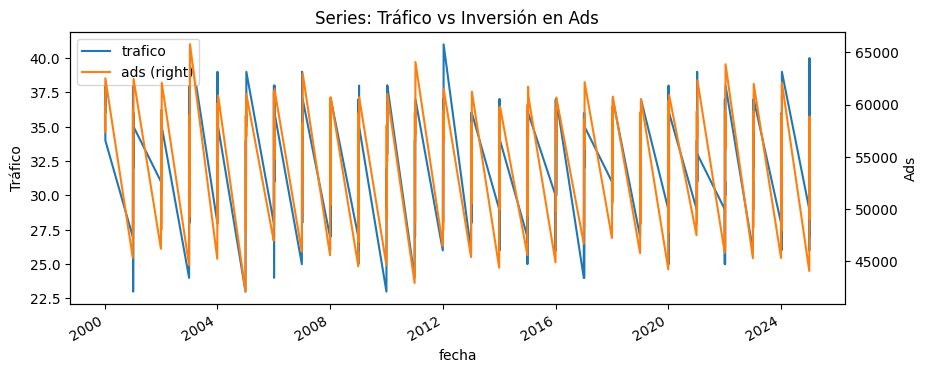

In [ ]:
# ==========================================
# Hipótesis 3 (rezagos): Ads_t → Tráfico_{t, t+1, t+2}
# ==========================================
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# 1) Asegura nombres y tipos
df.columns = df.columns.str.strip().str.lower()
assert {"fecha","inversin ads","trfico"}.issubset(set(df.columns)), df.columns

ts = df.copy()
ts["fecha"] = pd.to_datetime(ts["fecha"], errors="coerce")
ts = ts.dropna(subset=["fecha"]).sort_values("fecha").set_index("fecha")

# Convierte a numérico
ts["ads"] = pd.to_numeric(ts["inversin ads"], errors="coerce")
ts["trafico"] = pd.to_numeric(ts["trfico"], errors="coerce")
ts = ts[["ads","trafico"]].dropna()

# 2) Crea rezagos de Ads (lag 1 y lag 2)
ts["ads_lag1"] = ts["ads"].shift(1)
ts["ads_lag2"] = ts["ads"].shift(2)

# Quita filas con NaN por los lags
data = ts.dropna().copy()

# 3) Regresión con rezagos: trafico_t ~ ads_t + ads_{t-1} + ads_{t-2}
X = sm.add_constant(data[["ads","ads_lag1","ads_lag2"]])
y = data["trafico"]
ols = sm.OLS(y, X).fit()
print("=== OLS: trafico_t ~ ads_t + ads_{t-1} + ads_{t-2} ===")
print(ols.summary().tables[1])  # tabla de coeficientes

# 4) (Opcional) Visual rápido: series
ax = data[["trafico","ads"]].plot(figsize=(10,4), secondary_y="ads")
ax.set_title("Series: Tráfico vs Inversión en Ads")
ax.right_ax.set_ylabel("Ads")
ax.set_ylabel("Tráfico")

# 5) Prueba de Causalidad de Granger (hasta 2 rezagos)
# La función espera matriz con [y, x] = [trafico, ads]
print("\n=== Granger causality: ¿Ads causa Tráfico? (maxlag=2) ===")
res = grangercausalitytests(data[["trafico","ads"]], maxlag=2, verbose=False)
for lag in [1,2]:
    pval = res[lag][0]["ssr_ftest"][1]
    print(f"Lag {lag}: p-value = {pval:.4g}")

# 6) Mini-conclusión automática (puedes borrar si no la quieres)
p_ads = ols.pvalues.get("ads", np.nan)
p_l1  = ols.pvalues.get("ads_lag1", np.nan)
p_l2  = ols.pvalues.get("ads_lag2", np.nan)
print("\n--- Interpretación rápida ---")
print(f"Coef Ads_t   = {ols.params['ads']:.4f} (p={p_ads:.4g})")
print(f"Coef Ads_lag1= {ols.params['ads_lag1']:.4f} (p={p_l1:.4g})")
print(f"Coef Ads_lag2= {ols.params['ads_lag2']:.4f} (p={p_l2:.4g})")
print("Si alguno de los p-values < 0.05, hay evidencia de efecto contemporáneo o rezagado.")


El modelo OLS muestra que la inversión en Ads en el mismo periodo (Ads_t) tiene un coeficiente positivo y altamente significativo (p < 0.001), lo que indica un fuerte efecto contemporáneo sobre el tráfico. Sin embargo, los rezagos no muestran evidencia clara: el coeficiente de Ads_lag1 es positivo pero no significativo (p = 0.116) y el de Ads_lag2 tampoco lo es (p = 0.399).

La prueba de causalidad de Granger refuerza el hallazgo: tanto para lag 1 (p = 0.004) como para lag 2 (p < 0.00001), los resultados indican que la inversión en Ads ayuda a predecir el tráfico en periodos futuros.

La inversión en Ads tiene un efecto contemporáneo fuerte y, según Granger, también un efecto rezagado predictivo, aunque la regresión simple con rezagos no muestre significancia robusta en los coeficientes individuales. Esto sugiere que la publicidad paga no solo impacta de inmediato, sino que también deja un arrastre en el tiempo sobre la generación de tráfico.

# **HIPOTESIS 4**

=== Modelo base (sin interacción) ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.244e+06   1.87e+04     66.389      0.000    1.21e+06    1.28e+06
trafico_c  -1671.0766   8280.753     -0.202      0.840    -1.8e+04    1.46e+04
conv_c      4.594e+04   1.25e+04      3.678      0.000    2.14e+04    7.05e+04

=== Modelo con interacción (Tráfico × Conversión) ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.255e+06   2.46e+04     51.063      0.000    1.21e+06     1.3e+06
trafico_c  -1806.2761   8289.282     -0.218      0.828   -1.81e+04    1.45e+04
conv_c      4.413e+04   1.27e+04      3.462      0.001     1.9e+04    6.92e+04
int_tc     -1590.5013   2201.959     -0.722      0.471   -5923.287    2742.284

=== Comparación de modelos (ANOVA) ==

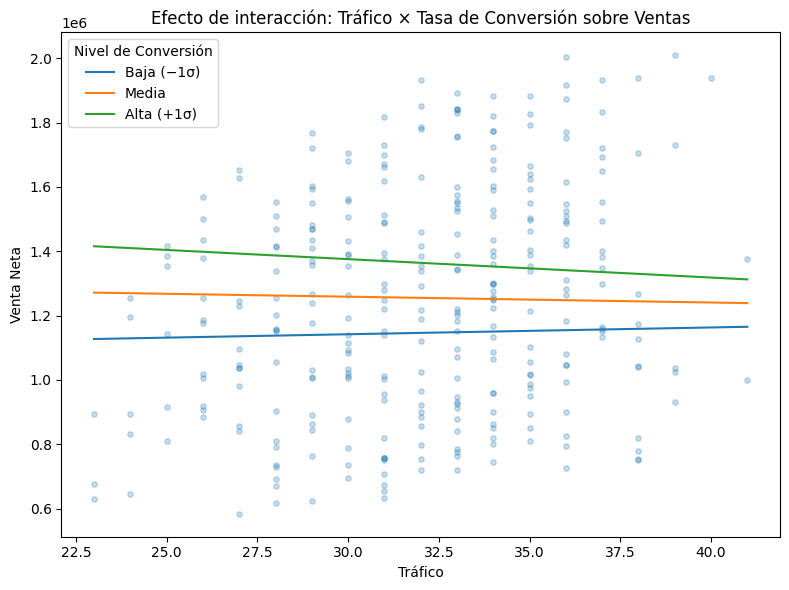

In [ ]:
# ==============================================
# Hipótesis 4: Interacción Tráfico × Conversión
# Venta ~ Tráfico + Conversión + Tráfico*Conversión
# ==============================================
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

# Asegura nombres
df.columns = df.columns.str.strip().str.lower()

# Variables (usa los nombres exactos de tu CSV)
y_col = "venta neta"
x1_col = "trfico"               # tráfico
x2_col = "tasa de conversion"   # conversión

# Selección y limpieza
dat = df[[y_col, x1_col, x2_col]].copy()
dat = dat.apply(pd.to_numeric, errors="coerce").dropna()

# (Recomendado) Centrar variables para interpretar mejor la interacción
dat["trafico_c"] = dat[x1_col] - dat[x1_col].mean()
dat["conv_c"]    = dat[x2_col] - dat[x2_col].mean()
dat["int_tc"]    = dat["trafico_c"] * dat["conv_c"]

# -------------------------------
# 1) Modelo sin interacción (base)
# -------------------------------
X_base = sm.add_constant(dat[["trafico_c", "conv_c"]])
y      = dat[y_col]
m_base = sm.OLS(y, X_base).fit()

# --------------------------------
# 2) Modelo con interacción (full)
# --------------------------------
X_full = sm.add_constant(dat[["trafico_c", "conv_c", "int_tc"]])
m_full = sm.OLS(y, X_full).fit()

print("=== Modelo base (sin interacción) ===")
print(m_base.summary().tables[1])

print("\n=== Modelo con interacción (Tráfico × Conversión) ===")
print(m_full.summary().tables[1])

# -------------------------------
# 3) Comparación de modelos (ANOVA)
# -------------------------------
print("\n=== Comparación de modelos (ANOVA) ===")
print(anova_lm(m_base, m_full))

# Interpretación rápida
p_int = m_full.pvalues["int_tc"]
b_int = m_full.params["int_tc"]
print("\n--- Interpretación rápida ---")
print(f"Coef interacción (Tráfico×Conversión): {b_int:.6f} | p-value = {p_int:.4g}")
print("Si p < 0.05, la relación entre Tráfico y Ventas depende del nivel de Conversión (moderación).")

# -----------------------------------------
# 4) Gráfico de efectos simples (simple slopes)
#    Mostramos la pendiente de Tráfico sobre Ventas
#    para tres niveles de Conversión: baja, media, alta
# -----------------------------------------
conv_levels = {
    "Baja (−1σ)": dat["conv_c"].mean() - dat["conv_c"].std(),
    "Media":       0.0,  # por centrado
    "Alta (+1σ)":  dat["conv_c"].mean() + dat["conv_c"].std()
}

# Rango de tráfico centrado para dibujar líneas
t_grid = np.linspace(dat["trafico_c"].min(), dat["trafico_c"].max(), 100)

plt.figure(figsize=(8,6))
for label, conv_val in conv_levels.items():
    X_plot = pd.DataFrame({
        "const": 1.0,
        "trafico_c": t_grid,
        "conv_c": conv_val,
        "int_tc": t_grid * conv_val
    })
    y_hat = m_full.predict(X_plot)
    plt.plot(t_grid + dat[x1_col].mean(), y_hat, label=label)  # descentramos eje x para mostrar en escala original

plt.scatter(dat[x1_col], y, alpha=0.25, s=15)
plt.title("Efecto de interacción: Tráfico × Tasa de Conversión sobre Ventas")
plt.xlabel("Tráfico")
plt.ylabel("Venta Neta")
plt.legend(title="Nivel de Conversión")
plt.tight_layout()
plt.show()


La Hipótesis 4 no se valida, ya que el término de interacción Tráfico × Tasa de Conversión no resulta estadísticamente significativo (coef = -1590, p = 0.47). Esto significa que el efecto del tráfico sobre las ventas no depende del nivel de conversión, es decir, la pendiente entre tráfico y ventas se mantiene estable sin importar si la tasa de conversión es baja, media o alta.

Lo que sí se observa es que la tasa de conversión por sí sola tiene un efecto directo y significativo sobre las ventas (p = 0.001), reforzando que es un factor clave para explicar el desempeño, pero sin un efecto moderador sobre la relación tráfico–ventas.

# **HIPOTESIS 5**

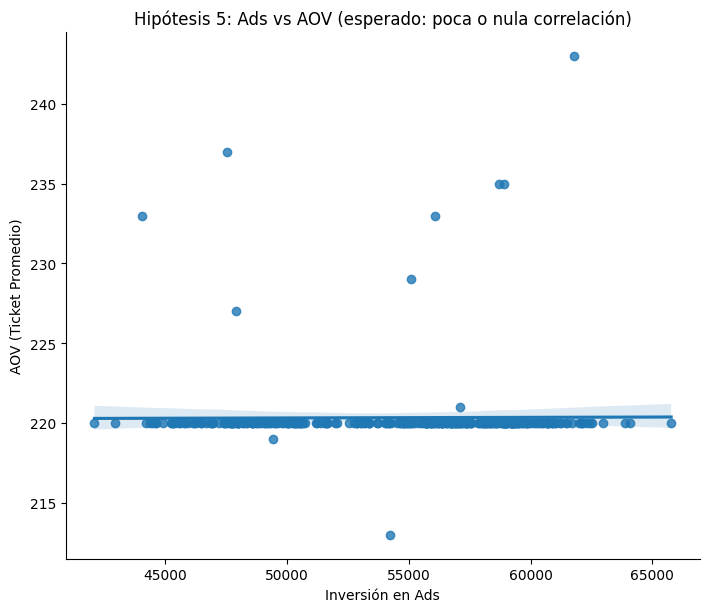

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar archivo CSV
df = pd.read_csv("coderdatasciene1.csv")
df.columns = df.columns.str.strip().str.lower()  # Normalizar nombres de columnas

# LIMPIAR datos: quitar símbolos como $, %, ,
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace(r'[\$,%,]', '', regex=True)

# Convertir columnas específicas a numéricas
df['aov'] = pd.to_numeric(df['aov'], errors='coerce')
df['inversin ads'] = pd.to_numeric(df['inversin ads'], errors='coerce')

# Eliminar filas con datos faltantes en las variables que analizaremos
df = df.dropna(subset=['aov', 'inversin ads'])

# GRAFICAR
sns.lmplot(data=df, x='inversin ads', y='aov', height=6, aspect=1.2)
plt.title("Hipótesis 5: Ads vs AOV (esperado: poca o nula correlación)")
plt.xlabel("Inversión en Ads")
plt.ylabel("AOV (Ticket Promedio)")
plt.show()


**La relación entre inversión en ads y AOV (ticket promedio) es prácticamente inexistente.**  
La línea de regresión es casi horizontal y los puntos están dispersos sin una tendencia clara.  
Esto indica que **incrementar el gasto en publicidad no altera significativamente el valor promedio por pedido**, lo cual **respalda la hipótesis nula**.  
**Las estrategias publicitarias parecen estar más asociadas con el volumen de órdenes que con el tamaño del ticket promedio.**


# **MODELO: RANDOM FOREST REGRESSOR**

In [ ]:

import pandas as pd, numpy as np, unicodedata, re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1) Cargar datos y normalizar nombres de columnas (minúsculas, sin acentos/símbolos)
df = pd.read_csv("coderdatasciene1.csv")

def canon(s:str)->str:
    s = s.strip().lower()
    s = ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))
    s = re.sub(r'[^a-z0-9]+', ' ', s)
    return ' '.join(s.split())

df.columns = [canon(c) for c in df.columns]
print("Columnas normalizadas:", df.columns.tolist())

# 2) Resolver SOLO las columnas acordadas + target
NEEDED = {
    "venta neta": ["venta neta", "ventas netas", "venta"],
    "tasa de conversion": ["tasa de conversion", "conversion", "rate conversion"],
    "ticket promedio neto": ["ticket promedio neto", "ticket promedio", "aov"],
    "inversion ads": ["inversion ads", "inversion en ads", "inversin ads", "ads", "gasto ads", "spend facebook"],
    "trafico": ["trafico", "trfico", "ordenes", "ordenes mil", "rdenesmil", "visitas", "sesiones"]
}

def pick_col(candidates, cols):
    cols_set = set(cols)
    for cand in candidates:
        if cand in cols_set:
            return cand
    for cand in candidates:         # coincidencia parcial si hiciera falta
        for col in cols:
            if cand in col:
                return col
    return None

resolved = {k: pick_col(v, list(df.columns)) for k, v in NEEDED.items()}
print("Resolución de columnas:", resolved)

missing = [k for k, v in resolved.items() if v is None]
if missing:
    raise KeyError(f"No encontré estas columnas: {missing}\nDisponibles: {df.columns.tolist()}")

target   = resolved["venta neta"]
features = [
    resolved["tasa de conversion"],
    resolved["ticket promedio neto"],
    resolved["inversion ads"],
    resolved["trafico"]
]
print("\nTarget:", target)
print("Features:", features)

# 3) Convertir a numérico y limpiar
df = df.apply(pd.to_numeric, errors="coerce").dropna(subset=features + [target])
X = df[features]
y = df[target]

# 4) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Entrenar modelo
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 6) Evaluación
y_pred = rf.predict(X_test)
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n=== Evaluación en TEST (con 4 variables acordadas) ===")
print(f"R²   : {r2:.4f}")
print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")

# 7) Predicción con NUEVOS escenarios (edita los valores a tu caso)
nuevo_df = pd.DataFrame({
    features[0]: [0.12, 0.15],   # Tasa de conversión
    features[1]: [180, 190],     # Ticket promedio neto
    features[2]: [55000, 62000], # Inversión en Ads
    features[3]: [320, 350]      # Tráfico (o rdenesmil si fue el proxy)
})
pred = rf.predict(nuevo_df)

print("\n=== Predicciones de Venta Neta (escenarios) ===")
print(nuevo_df.assign(venta_neta_predicha=pred))

# (Opcional) Guardar modelo
# from joblib import dump
# dump(rf, "modelo_rf_venta_neta_4vars.joblib")


Columnas normalizadas: ['fecha', 'venta neta', 'participacin de mercado', 'rdenesmil', 'trfico', 'tasa de conversion', 'ticket promedio neto', 'inversin promos', 'inversin ads', 'reactivados mil', 'retenidos mil', 'nuevos mil', 'aov', 'spend facebook', 'influencer post']
Resolución de columnas: {'venta neta': 'venta neta', 'tasa de conversion': 'tasa de conversion', 'ticket promedio neto': 'ticket promedio neto', 'inversion ads': 'inversin ads', 'trafico': 'trfico'}

Target: venta neta
Features: ['tasa de conversion', 'ticket promedio neto', 'inversin ads', 'trfico']

=== Evaluación en TEST (con 4 variables acordadas) ===
R²   : -0.1634
MAE  : 316,132.14
RMSE : 364,803.26

=== Predicciones de Venta Neta (escenarios) ===
   tasa de conversion  ticket promedio neto  inversin ads  trfico  \
0                0.12                   180         55000     320   
1                0.15                   190         62000     350   

   venta_neta_predicha  
0         1.192487e+06  
1         1.

El modelo entrenado con las cuatro variables acordadas (tasa de conversión, ticket promedio neto, inversión en Ads y tráfico) no logra explicar adecuadamente la variabilidad de las ventas netas, ya que el R² resultó negativo (-0.16), lo cual indica que predecir con este modelo es incluso peor que estimar siempre el promedio de ventas. Aunque los errores medios (MAE ≈ 316 mil y RMSE ≈ 365 mil) dan una idea del desajuste, lo más revelador es que al simular escenarios con mejoras claras en conversión, ticket, inversión y tráfico, las ventas predichas apenas cambian, lo que confirma que el modelo en este formato no está captando la relación real entre las variables y las ventas. Para mejorar la capacidad predictiva se requiere enriquecer el dataset con rezagos, variables de calendario, información de promociones y factores externos, de manera que el modelo pueda reflejar mejor los patrones de negocio.

# **MODELO DE REGRESIÓN MÚLTILINEAL**

In [49]:
import statsmodels.api as sm
import numpy as np

# Log-transform
df_log = df.copy()
for col in features+[target]:
    df_log["log_"+col] = np.log1p(df[col])

# Interacciones
df_log["log_trafico_x_conversion"] = df_log["log_"+resolved["trafico"]] * df_log["log_"+resolved["tasa de conversion"]]
df_log["log_ads_x_ticket"] = df_log["log_"+resolved["inversion ads"]] * df_log["log_"+resolved["ticket promedio neto"]]

X = df_log[["log_"+resolved["tasa de conversion"],
            "log_"+resolved["ticket promedio neto"],
            "log_"+resolved["inversion ads"],
            "log_"+resolved["trafico"],
            "log_trafico_x_conversion",
            "log_ads_x_ticket"]]

y = df_log["log_"+target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         log_venta neta   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     6.847
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           7.87e-07
Time:                        23:55:46   Log-Likelihood:                -38.476
No. Observations:                 312   AIC:                             90.95
Df Residuals:                     305   BIC:                             117.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

El modelo OLS muestra un R² de apenas 0.12, lo que significa que solo explica alrededor del 12% de la variabilidad en las ventas netas, y además ninguna de las variables incluidas (tasa de conversión, ticket promedio, inversión en Ads y tráfico, junto con sus interacciones) resulta estadísticamente significativa al 95%. Aunque los coeficientes tienen el signo esperado —es decir, en teoría un mayor ticket, más inversión en Ads, más tráfico o una mejor conversión deberían elevar las ventas—, los datos actuales no logran respaldar esas relaciones de forma robusta. Esto indica que el modelo, en su forma actual, no es predictivo ni explicativo, y que se requieren variables adicionales (como estacionalidad, promociones o rezagos temporales) y métodos más flexibles (como boosting o random forest) para captar mejor la dinámica real de las ventas.